# Linear regression

## Prerequisites

- Basic Python
- Linear algebra

## Learning objectives

- Know the difference between monovariate and multivariate regressions
- Implement your first machine learning algorithm from scratch, in Python
- Use analytical solution to solve for it
- See how to optimize linear regression using analytical solution

## Loading dataset

Once again we will use `California` dataset from `sklearn`, we saw it previously, easy stuff by now. Let's also split it into validation and test:

In [1]:
from sklearn import datasets, model_selection

# 15% for validation and test, 70% for train in total
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

print(X_train.shape, y_train.shape)

(14448, 8) (14448,)


## What is linear regression?

Classic starting point for machine learning adventures, something like `Hello World` but in ML world.

__Linear regression predicts continuous outputs__ - hence the regression part of the name.
Linear regression makes predictions that are simply a __`w`eighted__ combination (a linear combination) of the inputs (plus some offset called __`b`ias__). It is described by linear function:

$$
    y = wx + b
$$




<p align=center><img width=700 src=images/linear_model.jpg></p>

In future we will experience much more complex, nonlinear relationships between features and labels that we wish to model. 

But __do not underestimate linear regression__ as it is often used in statistics and to explain a lot of phenomenas, at the end of the lesson we will see when it should be used in real world.

Functions that a model represent are often referred to as the **hypothesis**.

<p align=center><img width=800 src=images/linear_model_example.jpg></p>

We will make our model able to make predictions for many examples at a time by expressing the hypothesis in vector form as shown below.

<p align=center><img width=700 src=images/linear_model_vector.jpg></p>

Here's an example of what that computation might look like numerically.

<p align=center><img width=700 src=images/linear_model_vector_example.jpg></p>




## Mathematical formula of model



Formula below presents linear regression for single example __but multiple features__:

$$
\begin{equation}
    y = w_1x_1 + w_2x_2 + ... + w_Nx_N + b = \sum_{i=1}^{N} w_ix_i + b
\end{equation}
$$

Essentially:
- each feature in our sample is multiplied by a weight
Now let's implement our first machine learning model in code!

## Multiple features

We will go for multiple features, so here is how our weights will look like:

<p align=center><img width=700 src=images/w_vector.jpg></p>

The weights variable (w) becomes a row vector so we need to transpose it when we multiply it by the X matrix (or take a `dot` product of `data` and `weights`).

<p align=center><img width=800 src=images/vector_linear_regression.jpg></p>

## Monovariate vs multivariate

A dychotomy you might sometimes come across:

> monovariate linear regression is linear regression done with __one or multiple features__ but __predicting single target__

And __multivariate__ (as you may of guessed) would be

> linear regression with __one or multiple variables (features)__ but __predicting multiple targets__ (which are correlated with each other)

In this notebook we will be doing __monovariate__ only, but we will get to __multivariate__ when we do multiclass classification.

## Exercise

`LinearRegression` implementation is our task!

- Create a class `LinearRegression` which takes a single `n_features` argument during initialization.
    - Create `W` and `b` variables inside initialization. One of shape `(n_features, 1)` and `bias` of shape `1` initialized with random normal distribution
- Create `__call__` function (what does it do, what is a functor?) which takes `X` (`np.array`). It should return predictions our linear regression should do (see formulas above in the picture, it's two operations only)
- Create `update_params` function which takes `W` and `b` and assigns them to appropriate variables in `self`.

In [19]:
import numpy as np

class LinearRegression:
    def __init__(self, n_features: int): # initalize parameters
        np.random.seed(10)
        self.W = np.random.randn(n_features, 1) ## randomly initialise weight
        self.b = np.random.randn(1) ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W ## set this instance's weights to the new weight value passed to the function
        self.b = b ## do the same for the bias

In [25]:
model = LinearRegression(n_features=8)  # instantiate our linear model
y_pred = model(X_test)  # make prediction on data
print("Predictions:\n", y_pred[:10]) # print first 10 predictions

Predictions:
 [[1482.14731583]
 [3169.69576072]
 [1131.67756962]
 [ 756.45841866]
 [ 963.42420785]
 [ 696.58323643]
 [ 859.12613003]
 [ 332.18098164]
 [ 890.04023052]
 [ 496.39589958]]


In [21]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

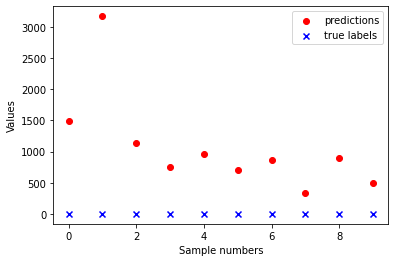

In [22]:
plot_predictions(y_pred[:10], y_test[:10])

## Analysis

As you can see predictions of our model are __way off__. This happens because we initialized our model with random weights and bias.

Now, we should learn how we can improve this model to learn from data:

## Loss - how do we know how good our model is?

As mentioned in the machine learning system design process, we need to set a baseline and try to surpass it as we train more models. But how can we obtain a quantitative measurement of how good the model is?

> Our **loss** should measure __how poor our model performs__. 

The larger the value, the worse so we will later try to __minimize it__ (bring as close to zero as possible). We will use it to give our model feedback about it's performance. 

> Loss values needs to return a **single number**, not a vector, not a matrix.

__NOTE:__ minimising the objective is equivalent to maximising the negative of it. 

Commonly, loss value is also called __cost function__ though it is not exact. Let's go over the difference now.

### Squared Error loss

> loss is a function which takes prediction and true label and returns __a positive scalar__

- The higher the loss value, the worse our model performs
- __Loss is defined on a single data point__

Squared error is one of the loss functions __used for regression tasks__ and is simply defined as:

$$
\begin{equation}
    (\hat{y} - y)^2
\end{equation}
$$

This does exactly what you think: it calculates the error (difference between our model's prediction $\hat{y}$ and the true value $y$):

$$
\begin{equation}
    \hat{y} - y
\end{equation}
$$

and then squares it to make the value positive. As long as the error is not zero it will increase the value of loss regardles of whether our prediction is below (negative error) or above (positive error) the value of the label.

### Mean Squared Error (MSE) cost function

> cost function is a generalization of loss functions for many data samples

So, __loss__ operates on single sample, while __cost__ operates on multiple of them.
In case of __Mean Squared Error__ we calculate squared error for each sample and take the mean of that value:

$$
\begin{equation}
    L_{mse} = \frac{1}{N}\sum_{i}^{N}(\hat{y_i} - y_i)^2
\end{equation}
$$

There are many other criterions that are useful for different tasks (e.g. the binary cross entropy (BCE) loss for classification, which we will cover later).

Let's write a function to calculate the cost using the mean squared error loss function. It should take in an array of predictions for different example inputs as well as an array of corresponding example labels. It should return a single number (scalar) that represents the MSE loss. 

## Exercise

Implement `mean_squared_error` function taking `y_pred` and `y_true`. Every formula is above (focusing on the last one is enough ;) )

In [ ]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)

In [ ]:
cost = mean_squared_error(y_pred, y_train)
print(cost)

## The analytical solution to minimising mean square error

Now that we have our __loss__ equation we can calculate it's derivative w.r.t. weights. When we set it to zero we can calculate __weights values (`W`)__ which minimize it.

<p align=center><img width=900 src=images/analytical_linear_reg.jpg></p>

Now let's implement this analytical solution for least squares regression in code:

## Exercise

Now that we have mathematical formula we can jump in straight to the implementation.

- For matrix inverse, you can use [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function
- Remember to return `weights` part of `matrix` first and `bias` after that (`bias` is the `0` element of the result)

In [ ]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

In case you didn't notice, this analytical solution has no mention of the model bias. 
In fact, we incorporate the model bias into our features matrix by adding an extra column filled with `1`.

<p align=center><img width=700 src=images/bias_in_weight_matrix.jpg></p>

Doing this makes the analytical solution much clearer and means we have to solve it only for one value $W$, rather than also for $b$.

In practice (iterative optimization), we treat them as separate variables (we will later see more about that).

## Update parameters

Now that we have found `optimal_w` we should update our model and see how it performs:

In [ ]:
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

## Drawbacks of computing the analytical solution

This solution involves inverting a matrix of size $R^{n \times n}$. 
Here $n$ is the number of features that each example has. 

With 8 features it is becoming more difficult. Furthermore, here, we only have ~20000 samples, while in real life we can have millions or more.

However, as we will see, most problems of practical interest contain examples with many more features. 

> For example, 1080p images have more than 1,000,000 features each. 

The time complexity of inverting a matrix of size $n \times n$ is around $O(n^3)$. 
This means that computing the analytical solution for these kinds of real world problems is often computationally expensive or even impossible.

Analytical solutions however, are not the only approach that we can take (and usually we __even cannot use them__ as the close form cannot be calculated).

We will see how to update parameters iteratively soon.

## Models in `sklearn`

`sklearn` comes with some common machine learning models that you can use out of the box, with a simple to use API.

(See the linear regression [documentation](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors)).

Let's get some data and then load [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Also import appropriate package from `sklearn` to do that:

In [2]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_california_housing(return_X_y=True)

model = linear_model.LinearRegression()

## How to use `sklearn`'s API of models

`sklearn` machine learning algorithms are objects which usually follow this general convention:

- `__init__(*args, **kwargs)` - here you setup your algorithm (as seen above).
- `fit(X, [y])` - train the model on `X` (features) and `y` (targets). In case of unsupervised algorithms there is no `y`
- `predict(X)` - pass data (previously unseen) to algorithm after `fit` was called. This gives us predictions (`y_pred`).

Given that we can do the following:

In [3]:
model.fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5], "\n", y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744] 
 [4.526 3.585 3.521 3.413 3.422]


## Evaluating our model

So our model predicts some values, but how well does it actually do? `sklearn` provides performance __metrics__ for us to use.

You can see `sklearn`'s metrics [here](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics), in this case we will use [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

Below, we import `sklearn.metrics.mean_squared_error` using `from` import syntax and
display what is the error between true targets and predicted ones

In [4]:
from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

0.5243209861846072

## Model persistance

Training (`fitting`) process is often quite expensive (in time and or compute cost), while what we are after is the ability to predict on unseen data.

We see our model works okay and we would like to save it for later use without the need to `train` on the data again.

> Model persistence means saving your machine learning algorithm currently held in RAM (Random Access Memory) to a storage (usually hard drive) from which it can be reinstantiated at any point in time

As per usual it's simple with `sklearn`:

In [ ]:
import joblib

joblib.dump(model, "model.joblib")

## Congratulations, BUT

You made your first machine learning model in roughly `5` lines of code.
Why would we need anything else?

### Downsides

As `sklearn` is very high level it doesn't require much knowledge to use as is.
But __we have to know more__ in order to do machine learning well. What is missing here:

- Why and what for? There are many more ways (and way more correct) to do machine learning
- Knowledge of machine learning algorithms; we have to know which one to choose for which kind of problems
- Knowledge of possible pitfalls; machine learning can easily go wrong. We have to know more about it in order to improve our model's performance
- In-depth knowledge of the ideas; often it might be a good idea to implement major ideas on your own

__We will do all of the above__, but hopefully you can see how easy and definitely not scary it can be.

## `sklearn` tips

- __Always try easiest solution first__. Create a weak baseline algorithm and check how it performs. Do not go straight to the most complicated ones! It is called [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in philosophy and machine learning also
- Some algorithms have attributes you might be interested in. Those are usually suffixed by `_` underscore, for example `my_algorithm.interesting_attribute_`
- Some `__init__` functions have __a lot of possible arguments__. Each of them influences how the algorithm works. But which are the most important and have the most influence? __In `sklearn` those arguments come in order from most influential to least__
- Many `sklearn` algorithms provide `n_jobs` argument, which parallelizes `fit`, `predict` and other functions. You can use `n_jobs=-1` to use as many processes as there are virtual cores (it is often a reasonable amount), which improves performance tremendously.
- __Use idiomatic `sklearn`__ - search the documentation, use pipelines if possible

## Summary

- linear regression is "hello world" basic machine learning model
- linear regression updates it's weight vector and bias in order to improve on the task
- this update can be carried out via analytically calculated formula
- the MSE loss is appropriate for many regression problems and is the most common loss function for this task